# Titanic Survival Predictions using Logistic Regression with Python

In this notebook we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

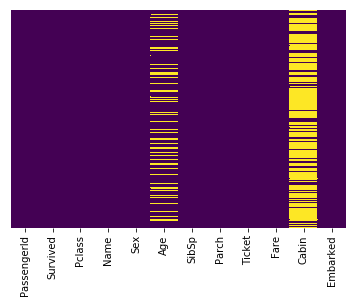

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

In [5]:
sns.set_style('whitegrid')

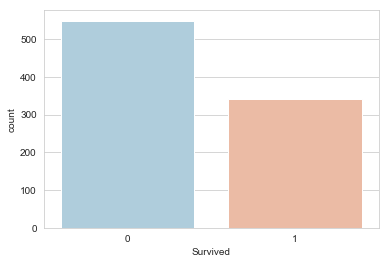

In [6]:
# Analyzing the count of people survived and not survived
sns.countplot(x='Survived', data=train, palette='RdBu_r')

Looks like 550+ people died and around 350 people had survived.

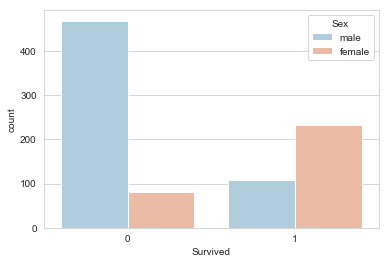

In [7]:
# Analyzing the count of people survived and not survived FOR EACH GENDER
sns.countplot(x='Survived', data=train, palette='RdBu_r', hue='Sex')

From the fig, we can understand that people who are died are mostly males and people who are survived are mostly females (ratio of around 2:1 with respec to males).

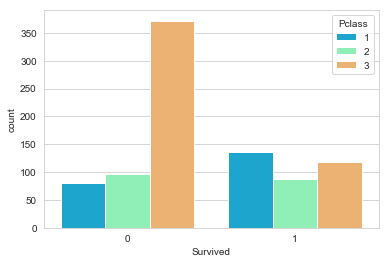

In [8]:
# Analyzing the count of people survived and not survived with respect to PClass
sns.countplot(x='Survived', data=train, palette='rainbow', hue='Pclass')

From the fig, we can understand that people who present is Pclass 3 are mostly not survived. 

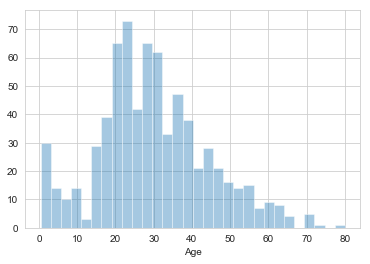

In [9]:
#Analyzing the age of the people who were in titanic
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

Or

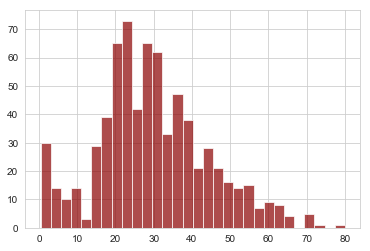

In [10]:
train['Age'].hist(bins=30, color='darkred', alpha=0.7)

From the fig, we can unsderstand that the average age of the people present in titanic were around 25 to 30.

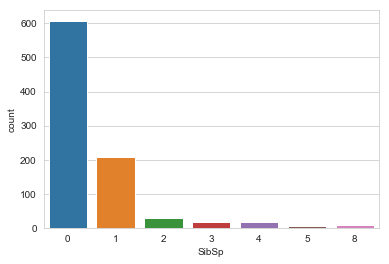

In [11]:
# Analyzing count of SibSp
sns.countplot('SibSp', data=train)

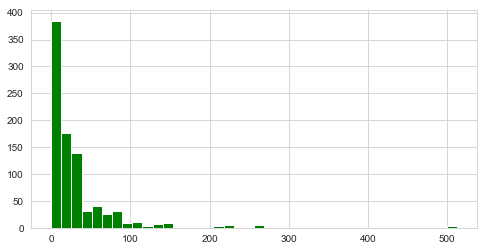

In [12]:
# Analyzing the disteibution of fare amount
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
train['Fare'].iplot(kind='hist', color='green', bins=40)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


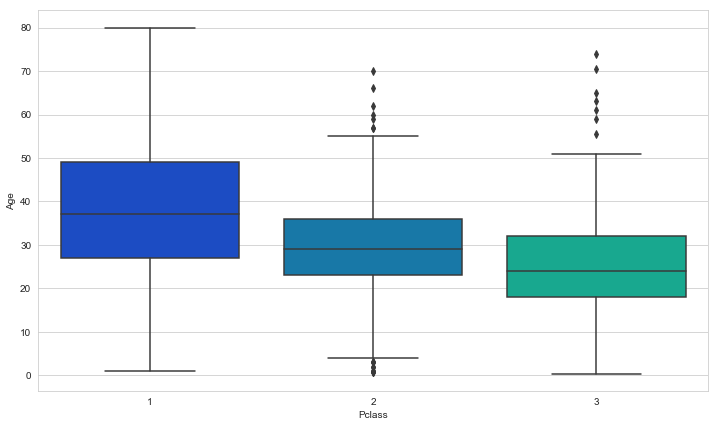

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

Now let's check that heat map again!

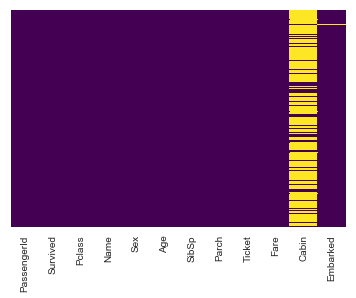

In [18]:
sns.heatmap(data=train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [19]:
train.drop('Cabin', axis=1, inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


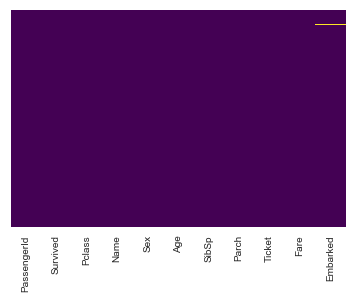

In [22]:
sns.heatmap(data=train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

Only few null values are present in Embarked column.

In [23]:
len(train)

891

In [24]:
train.dropna(inplace=True)

In [25]:
len(train)

889

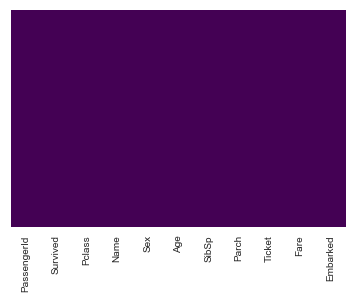

In [26]:
sns.heatmap(data=train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

All null values are removed.

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [29]:
pd.get_dummies(train['Sex']).head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [30]:
pd.get_dummies(train['Embarked']).head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [31]:
# To get k-1 dummies out of k categorical levels by removing the first level
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [33]:
sex.head(3)

,male
0,1
1,0
2,0


In [34]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


Dropping the string columns and categorical columns (Sex & Embarked) from the original dataframe.

In [35]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

Concatenating original dataframe with the categorical columns dataframe.

In [36]:
train = pd.concat([train,sex,embark], axis=1)

In [37]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


Now we have our training data, let's do the same cleaning process for our testing data as well.

### Cleaning test data

In [38]:
test = pd.read_csv('titanic_test.csv')

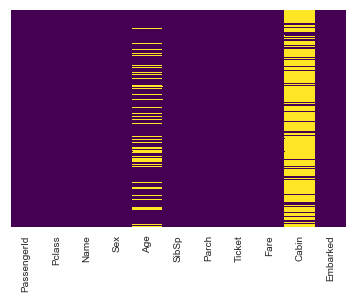

In [39]:
sns.heatmap(test.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [40]:
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

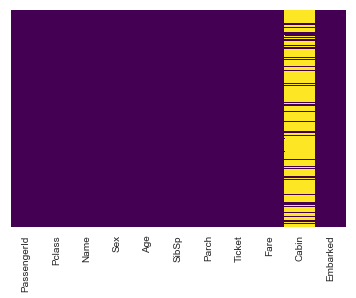

In [41]:
sns.heatmap(test.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [42]:
del sex, embark

In [43]:
# To get k-1 dummies out of k categorical levels by removing the first level
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)

In [44]:
test.drop('Cabin', axis=1, inplace=True)

In [45]:
test.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [46]:
test = pd.concat([test,sex,embark], axis=1)

In [47]:
test.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0


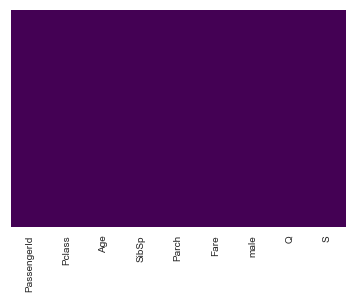

In [48]:
sns.heatmap(test.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [49]:
len(train)

889

In [50]:
len(test)

418

In [52]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = train.drop('Survived', axis=1)
y_test = train['Survived']

## Training and Predicting

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logModel = LogisticRegression()

In [56]:
logModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
predictions = logModel.predict(X_test)

In [61]:
predictions[:5]

array([0, 1, 1, 1, 0], dtype=int64)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [62]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_true=y_test, y_pred=predictions))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       549
          1       0.78      0.69      0.73       340

avg / total       0.80      0.81      0.80       889



### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(y_true=y_test, y_pred=predictions))

[[484  65]
 [107 233]]


## Thank You!